## Email Spam Detection Project:

In [72]:
#importing the dependencies

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [15]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [17]:
df = df[["v1","v2"]]

In [18]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.shape

(5572, 2)

In [26]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [27]:
df.duplicated().sum()

403

In [28]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [49]:
X = df["v2"]
y = df["v1"]

In [50]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [51]:
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [52]:
label_mapping = {"spam":1,"ham":0}
y = y.map(label_mapping)

In [53]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: v1, dtype: int64

* 0 == spam
* 1 == ham / not spam

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [58]:
X_train.shape ,X_test.shape

((4457,), (1115,))

In [59]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

In [61]:
rf_model =  RandomForestClassifier(n_estimators=100,random_state=40)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=40)

In [62]:
y_pred = rf_model.predict(X_test)

In [63]:
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)

Accuracy:  0.9802690582959641
Precision:  1.0
Recall:  0.8513513513513513


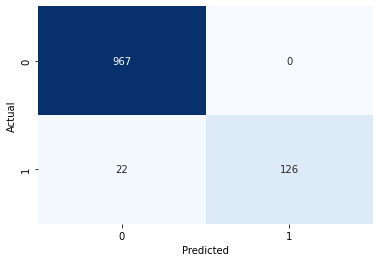

In [73]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()